In [1]:
import os
import json
import wandb
import gymnasium as gym
from matplotlib import pyplot as plt
import seaborn as sns
from models.sarsa import SARSA

## Initializing Environment and Hyperparameters

In [ ]:
env = gym.make('LunarLander-v2', continuous=False, render_mode='rgb_array')
learning_rate = 0.0005
discount_factor = 0.99
exploration_rate = 1.0
episodes = 500
max_steps = 1000

## Training

In [7]:
agent = SARSA(env, learning_rate, discount_factor, exploration_rate, 
            random_engine_fail=True, engine_fail_prob=0.2, fname='sarsa_ef')
history = agent.train(episodes, max_steps, log_wandb=True, save_episodes=True, save_interval=100)

[EP 1/500] - Reward: -84.6739 - Steps: 72 - Eps: 0.9227 - Time: 4.68s
[EP 2/500] - Reward: -108.4716 - Steps: 116 - Eps: 0.2876 - Time: 21.60s
[EP 3/500] - Reward: -229.2085 - Steps: 130 - Eps: 0.0779 - Time: 25.95s
[EP 4/500] - Reward: -143.9832 - Steps: 109 - Eps: 0.0260 - Time: 22.67s
[EP 5/500] - Reward: -222.1438 - Steps: 104 - Eps: 0.0100 - Time: 21.87s
[EP 6/500] - Reward: -358.5389 - Steps: 159 - Eps: 0.0100 - Time: 33.56s
[EP 7/500] - Reward: -188.7589 - Steps: 119 - Eps: 0.0100 - Time: 24.57s
[EP 8/500] - Reward: -149.6719 - Steps: 166 - Eps: 0.0100 - Time: 35.23s
[EP 9/500] - Reward: -29.0334 - Steps: 287 - Eps: 0.0100 - Time: 61.90s
[EP 10/500] - Reward: -82.1408 - Steps: 103 - Eps: 0.0100 - Time: 21.38s
[EP 11/500] - Reward: -207.9147 - Steps: 188 - Eps: 0.0100 - Time: 40.62s
[EP 12/500] - Reward: -54.3851 - Steps: 196 - Eps: 0.0100 - Time: 41.41s
[EP 13/500] - Reward: -264.6365 - Steps: 197 - Eps: 0.0100 - Time: 42.41s
[EP 14/500] - Reward: -167.7702 - Steps: 398 - Eps: 0

epsilon,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
reward,▁▁▁▃▇▄▇██▇███▇▇▇▆▄▂▅█▄███▇▄██▄▆▄█▇▄▄█▁▃█
steps,▁▁▆█▄▁▃▂▃▄▄▅▃▂▃▂█▂▃█▂█▂▂▂▃▁▂▃▁▃▁▂▂▁▁▂▂▁▂
epsilon,0.01
reward,27.20499
steps,133


In [8]:
# save history
if not os.path.exists('./history'):
        os.mkdir('./history')

with open('./history/sarsa_ef_history.json', 'w') as file:
    json.dump(history, file)

## Evaluation

In [3]:
with open('history\sarsa_ef_history.json', 'r') as file:
    history = json.load(file)

rewards, avg_rewards, steps = history['reward'], history['avg_reward_100'], history['steps']

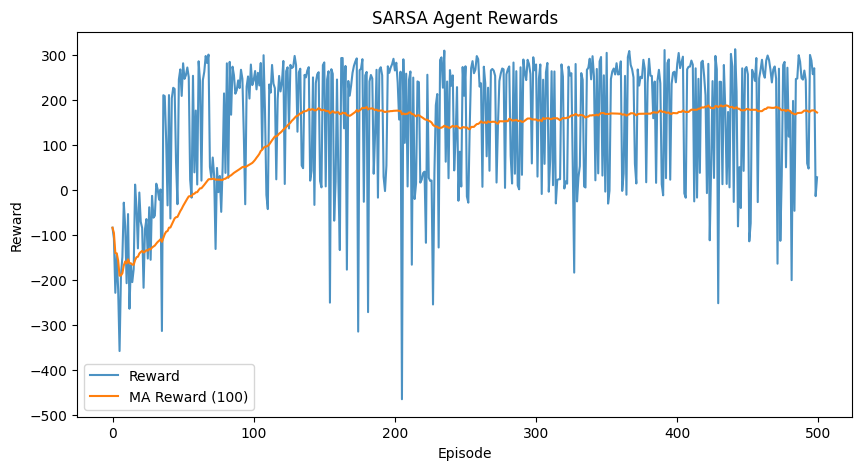

In [4]:
plt.figure(figsize=(10, 5))

plt.plot(rewards, alpha=0.8, label='Reward')
plt.plot(avg_rewards, label='MA Reward (100)')

plt.title('SARSA Agent Rewards')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.legend()

plt.show()

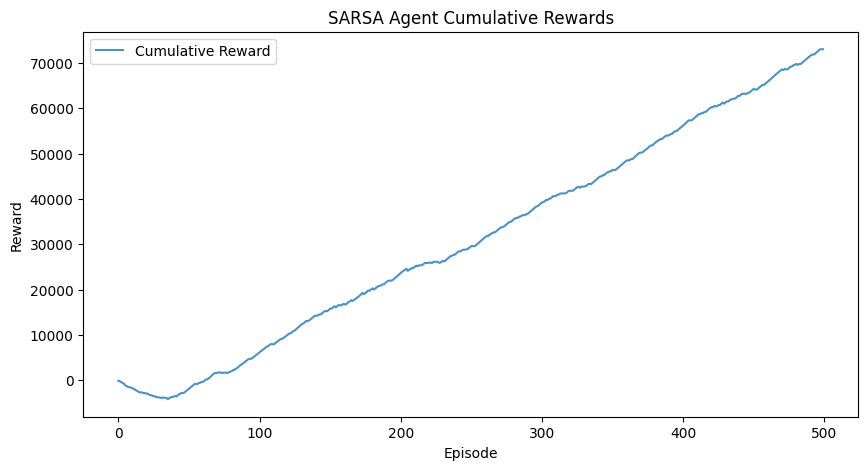

In [5]:
# plot cumulative reward
cumulative_reward = [sum(rewards[:i+1]) for i in range(len(rewards))]
plt.figure(figsize=(10, 5))

plt.plot(cumulative_reward, alpha=0.8, label='Cumulative Reward')

plt.title('SARSA Agent Cumulative Rewards')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.legend()
plt.show()

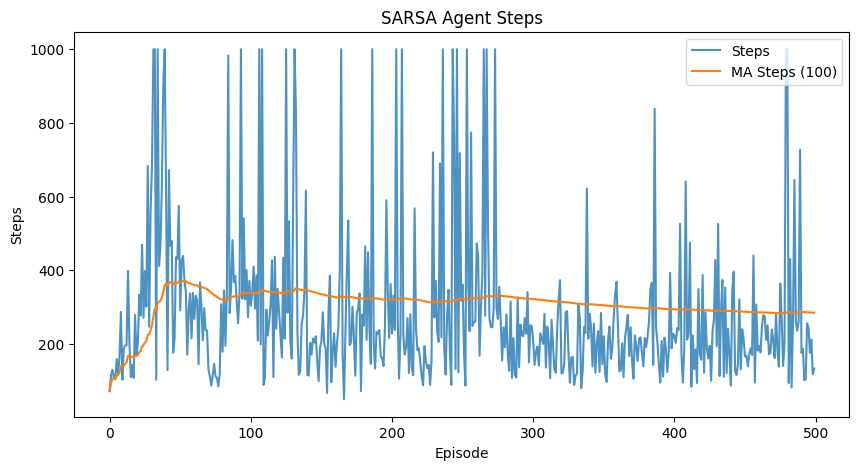

In [6]:
# plot steps and moving average steps
avg_steps = [sum(steps[:i+1])/(i+1) for i in range(len(steps))]
plt.figure(figsize=(10, 5))

plt.plot(steps, alpha=0.8, label='Steps')
plt.plot(avg_steps, label='MA Steps (100)')

plt.title('SARSA Agent Steps')
plt.xlabel('Episode')
plt.ylabel('Steps')
plt.legend()
plt.show()